In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 
import pandas as pd

## Diskret Hedge Eksperiment ved brug af BS

In [2]:
import math 
import numpy as np
import scipy.stats as si

def BS_call_price_delta(sigma, S, K, r, T, t, Greek):
    
    if Greek == 'Price' and T > 0: # Pris for en call option
        d1 = np.multiply(1. / (sigma*np.sqrt((T-t))),(np.log(S/K) + (r + sigma**2 / 2.) * (T-t)))
        d2 = d1 - sigma * np.sqrt((T-t))
        result = np.multiply(norm.cdf(d1),S) - np.multiply(norm.cdf(d2) * K, np.exp(-r * (T-t)))
        
    if Greek == 'Price' and T == 0:
        result = max(S-K,0)
    
    if Greek == "Delta" and T > 0: # dC/dS = Delta - Hvor meget vi skal købe/sælge af det underliggende aktiv
        d1 = np.multiply(1. / (sigma*np.sqrt((T-t))),(np.log(S/K) + (r + sigma**2 / 2.) * (T-t)))
        result = norm.cdf(d1)
        
    
    if Greek == 'Delta' and T == 0:
        result = 0
    
    return result

## Plot af delta

In [3]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['figure.figsize'] = [8, 6]

In [4]:
S_list = list(range(50,150+1))

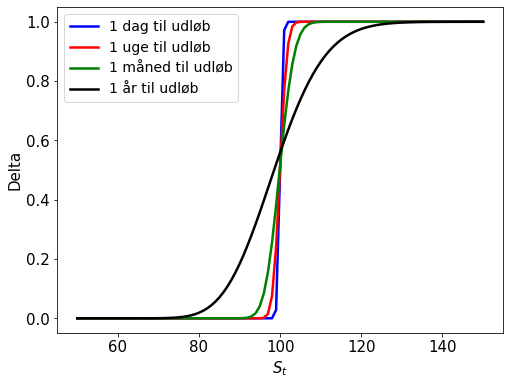

In [5]:
Delta_plots_25 = []
Delta_plots_50 = []
Delta_plots_75 = []
Delta_plots_100 = []
for i in range(50,150+1):
    Delta_plots_25.append(BS_call_price_delta(0.1, i, 100, 0.01, 1/252, 0, "Delta"))
    Delta_plots_50.append(BS_call_price_delta(0.1, i, 100, 0.01, 1/52, 0, "Delta"))
    Delta_plots_75.append(BS_call_price_delta(0.1, i, 100, 0.01, 1/12, 0, "Delta"))
    Delta_plots_100.append(BS_call_price_delta(0.1, i, 100, 0.01, 1, 0, "Delta"))
plt.plot(S_list, Delta_plots_25, color='blue', lw=2.5,label='1 dag til udløb')
plt.plot(S_list, Delta_plots_50, color='red',lw=2.5,label='1 uge til udløb')
plt.plot(S_list, Delta_plots_75, color='green',lw=2.5,label='1 måned til udløb')
plt.plot(S_list, Delta_plots_100, color='black',lw=2.5,label='1 år til udløb')
plt.legend(fontsize = 14)
plt.xlabel("$S_{t}$",fontsize=15)
plt.ylabel('Delta',fontsize=15)
plt.show()

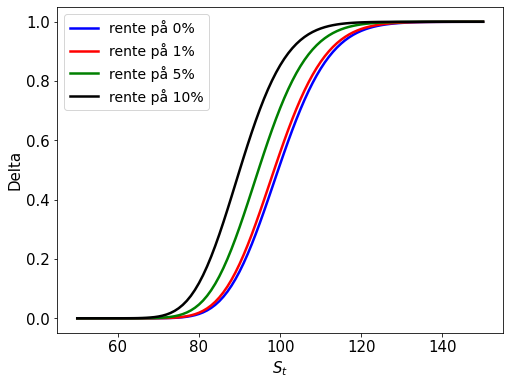

In [6]:
Delta_plots_0 = []
Delta_plots_1 = []
Delta_plots_5 = []
Delta_plots_10 = []
for i in range(50,150+1):
    Delta_plots_0.append(BS_call_price_delta(0.1, i, 100, 0.0, 1, 0, "Delta"))
    Delta_plots_1.append(BS_call_price_delta(0.1, i, 100, 0.01, 1, 0, "Delta"))
    Delta_plots_5.append(BS_call_price_delta(0.1, i, 100, 0.05, 1, 0, "Delta"))
    Delta_plots_10.append(BS_call_price_delta(0.1, i, 100, 0.10, 1, 0, "Delta"))
plt.plot(S_list, Delta_plots_0, color='blue',lw=2.5,label='rente på 0%')
plt.plot(S_list, Delta_plots_1, color='red',lw=2.5,label='rente på 1%')
plt.plot(S_list, Delta_plots_5, color='green',lw=2.5,label='rente på 5%')
plt.plot(S_list, Delta_plots_10, color='black',lw=2.5,label='rente på 10%')
plt.legend(fontsize=14)
plt.xlabel("$S_{t}$",fontsize=15)
plt.ylabel('Delta',fontsize=15)
plt.show()